# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 9. Байесовские классификаторы.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. 
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 28 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [2]:
from itertools import product

from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Set fig ratio
plt.rcParams["figure.figsize"] = (15,5)
sns.set(style='whitegrid', font_scale=1.2, palette='Set2')

---
### Задача 1.

На занятии мы уже научились классифицировать текстовые сообщения на нормальные и спам. Теперь перед вами стоит более серьезная задача &mdash; построить систему, автоматически классифицирующую поступающие новостные сюжеты на несколько заранее заданных категорий.
 
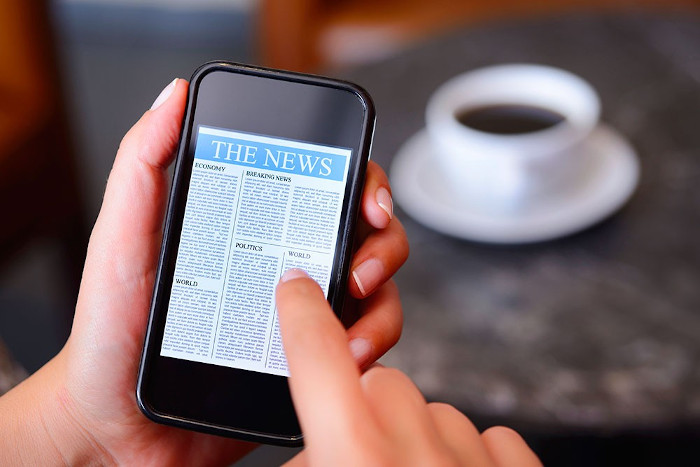



Перед выполнением задачи обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [3]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [4]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [5]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [6]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

С помощью методов, изученных в рамках нашего курса, постройте классификатор новостных сюжетов на тематические группы. При построении классификатора **запрещено пользоваться тестовой выборкой**. Для настройки классификатора, например, выбора оптимальных гиперпараметров, можно разделить обучающую выборку на две части &mdash; непосредственно обучающую и валидационную. Первую часть использовать для непосредственного обучения, а вторую &mdash; для настройки, пытаясь по ней оптимизировать качество.

Преобразования данных: объединения в один датафрэйм, а также деление на тестовую и вариационную части.

In [7]:
# Convert to df
df_train_, df_test = pd.DataFrame(data_train['data'], columns=['data']), pd.DataFrame(data_test['data'], columns=['data'])
df_train_['target'], df_test['target'] = data_train['target'], data_test['target']

# Train valid split
df_train, df_valid = train_test_split(df_train_, test_size=0.2, random_state=42)

Посмотрим на распределение классов.

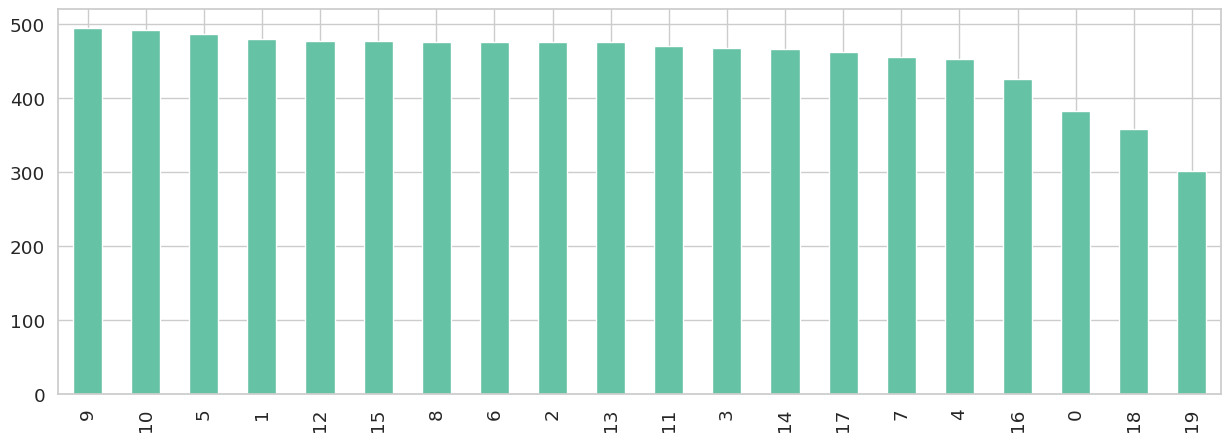

In [8]:
counts = pd.value_counts(df_train.target, sort=True)
counts.plot(kind='bar');

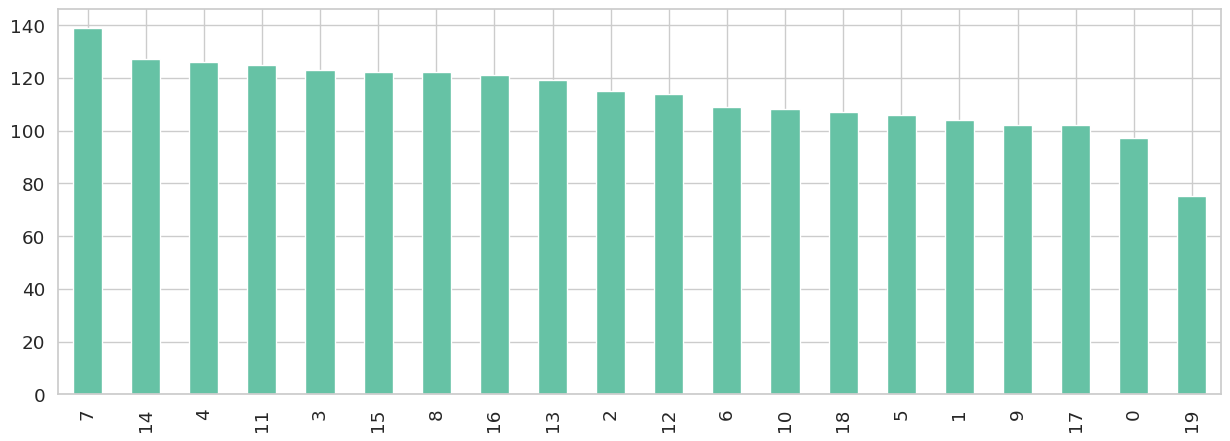

In [40]:
counts = pd.value_counts(df_valid.target, sort=True)
counts.plot(kind='bar');

Отсюда можно сделать вывод, о том что данные распределены достаточно равномерно, чтобы это незначительно повлияло на результаты классификатора.

Заведем функцию, для удобно подсчета точности на выборке.

In [9]:
def get_accuracy(model, data_x, data_y):
    predictions = model.predict(data_x)
    return accuracy_score(data_y, predictions)

Функция обучения и проверки мультиномиального наивного Байесовского классификатора.

In [13]:
def hyper_parameter_check(min_size, max_size):
    vectorizer = CountVectorizer(min_df=min_size, max_df=max_size)

    vec_data_train = vectorizer.fit_transform(df_train['data']).toarray()
    vec_data_valid = vectorizer.transform(df_valid['data']).toarray()

    multinomial_nb = MultinomialNB()
    multinomial_nb.fit(vec_data_train, df_train['target'])

    train_acc = get_accuracy(multinomial_nb, vec_data_train, df_train.target)
    valid_acc = get_accuracy(multinomial_nb, vec_data_valid, df_valid.target)
    return train_acc, valid_acc

Определим параметры для перебора

In [20]:
min_size_grid = np.linspace(0.01, 0.025, 5)
delta_size_grid = np.linspace(0.01, 0.1, 6)

Будем искать оптимальные гиперпараметры.

In [21]:
train_dict, valid_dict = {}, {}
for index, (min_size, delta) in enumerate(product(min_size_grid, delta_size_grid)):
    print("Iteration {:<2}:".format(index), end=" ")
    max_size = min_size + delta
    key = (min_size, max_size)
    train_dict[key], valid_dict[key] = hyper_parameter_check(*key)
    print(key, valid_dict[key])

Iteration 0 : (0.01, 0.02) 0.5832965090587715
Iteration 1 : (0.01, 0.038000000000000006) 0.6959787892178524
Iteration 2 : (0.01, 0.05600000000000001) 0.7176314626601856
Iteration 3 : (0.01, 0.074) 0.7193990278391516
Iteration 4 : (0.01, 0.092) 0.7202828104286345
Iteration 5 : (0.01, 0.11) 0.7176314626601856
Iteration 6 : (0.013999999999999999, 0.024) 0.5594343791427309
Iteration 7 : (0.013999999999999999, 0.042) 0.6442775077330977
Iteration 8 : (0.013999999999999999, 0.060000000000000005) 0.6734423331860362
Iteration 9 : (0.013999999999999999, 0.078) 0.6769774635439681
Iteration 10: (0.013999999999999999, 0.096) 0.6716747680070703
Iteration 11: (0.013999999999999999, 0.114) 0.6676977463543968
Iteration 12: (0.018, 0.027999999999999997) 0.515687140963323
Iteration 13: (0.018, 0.046) 0.6084843128590367
Iteration 14: (0.018, 0.064) 0.6403004860804242
Iteration 15: (0.018, 0.082) 0.6407423773751657
Iteration 16: (0.018, 0.1) 0.6425099425541316
Iteration 17: (0.018, 0.11800000000000001) 0.6

Найдем наилучший ключ.

In [36]:
val_array = np.array([*valid_dict.values()])
key_array = np.array([*valid_dict.keys()])
best_key = best_min, best_max = key_array[np.argmax(val_array)]

array([0.01 , 0.092])

Посчитайте качество на тестовой выборке.

Обучим модель на наилучших гиперпараметрах.

In [38]:
vectorizer = CountVectorizer(min_df=best_min, max_df=best_max)

vec_data_train = vectorizer.fit_transform(df_train['data']).toarray()
vec_data_valid = vectorizer.transform(df_valid['data']).toarray()
vec_data_test = vectorizer.transform(df_test['data']).toarray()

multinomial_nb = MultinomialNB()
multinomial_nb.fit(vec_data_train, df_train['target'])

train_acc = get_accuracy(multinomial_nb, vec_data_train, df_train.target)
valid_acc = get_accuracy(multinomial_nb, vec_data_valid, df_valid.target)
test_acc = get_accuracy(multinomial_nb, vec_data_test, df_test.target)

In [42]:
print(f'Точность на тренировочной: {train_acc :.3}')
print(f'Точность на валидационной: {valid_acc :.3}')
print(f'Точность на тестовой: {test_acc :.3}')

Точность на тренировочной: 0.783
Точность на валидационной: 0.72
Точность на тестовой: 0.621


### Выводы

Несмотря на то, что полученная точность не кажется очень большой. Но стоит отметить, что, как уже отмечалось, данные распределены по классам более-менее равномерно. А значит, при использовании тривиального классификатора точность будет около 0.05 при 20 классах. А это значит, что в качестве baseline'а байесовский классификатор подходит для решения некоторых задач, поскольку он также прост в написании.


Распределение классов на тренировочной выборке.

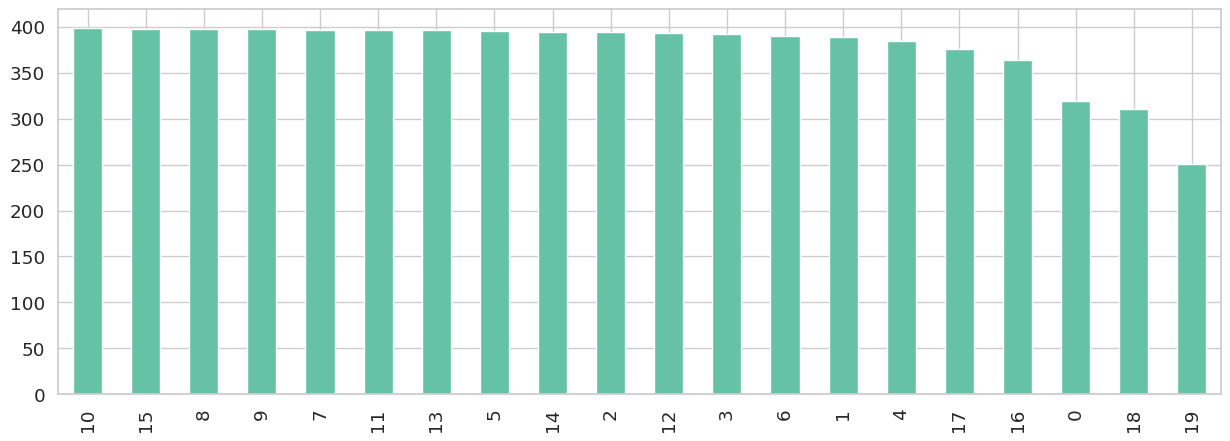

In [41]:
counts = pd.value_counts(df_test.target, sort=True)
counts.plot(kind='bar');

---
### Задача 2.
Пусть $\mathscr{X} = \mathbb{R}^2$ — пространство признаков, $\mathscr{Y} = \{0, 1\}$ — множество классов. Рассматривается квадратичный дискриминантный анализ. Условное распределение $X$ при условии $Y=k$ равно $\mathcal{N}(a_k, \Sigma_k)$. Приведите примеры таких параметров $a_k, \Sigma_k$ и вероятностей $\mathsf{P}(Y = k)$, при которых разделяющая поверхность является
* гиперболой;
* параболой;
* двумя параллельными прямыми;
* двумя пересекающимися прямыми.

*Примечание.* Можно подобрать выборку, посчитать оценки со страшными числами. Но еще лучше &mdash; немного подумать и привести пример с "красивыми" числами без какого-либо подбора выборки. В данном случае это довольно просто, а также позволяет лучше разобраться в параметрах многомерного нормального распределения.

Рассмотрим уравнение разделяющей поверхности для LDA и QDA:
$$
0 =\frac{1}{2} x^T (\hat{\Sigma_1}^{-1} - \hat{\Sigma_0}^{-1}) x + x^T (\hat{\Sigma_0}^{-1} \hat{a_0} - \hat{\Sigma_1}^{-1} \hat{a_1})  + (c_0 - c_1)
$$
Поскольку $\hat{\Sigma} \rightarrow \Sigma$ и $\hat{a} \rightarrow a$, а также $c_k = \mathsf{P}(Y=k)$:

$$
0 =\frac{1}{2} x^T (\Sigma_1^{-1} - \Sigma_0^{-1}) x + x^T (\Sigma_0^{-1} a_0 - \Sigma_1^{-1} a_1)  + (c_0 - c_1)
$$

### Гипербола
1) $a_0 = a_1 = 0$,
2) $c_0 = \frac{1}{3}, \quad c_1 = \frac{2}{3}$,
3) $\Sigma_1 = \begin{pmatrix}
\frac13 & 0 \\
0 & \frac12
\end{pmatrix}, \quad \Sigma_0 = \begin{pmatrix}
\frac12 & 0\\
0 & \frac13
\end{pmatrix}$.

Тогда уравнение поверхности равносильно:
$$
0 =\frac{1}{2} \begin{pmatrix} x_1 & x_2 \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} + \frac{-1}{3} \Leftrightarrow -1 = \frac32 x_1^2 - \frac32x_2^2.
$$
А это уравнение гиперболы.

### Две пересекающиеся прямые

Аналогично гиперболе (имением отношение вероятностей класса):
1) $a_0 = a_1 = 0$,
2) $c_0 = \frac{1}{2}, \quad c_1 = \frac{1}{2}$,
3) $\Sigma_1 = \begin{pmatrix}
\frac13 & 0 \\
0 & \frac12
\end{pmatrix}, \quad \Sigma_0 = \begin{pmatrix}
\frac12 & 0\\
0 & \frac13
\end{pmatrix}$.

Тогда уравнение поверхности равносильно:
$$
0 =\frac{1}{2} \begin{pmatrix} x_1 & x_2 \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} + 0 \Leftrightarrow 0 = x_1^2 - x_2^2.
$$
А это уравнение пересекающихся прямых.

### Парабола

1) $a_0 = \begin{pmatrix} 2 \\ 0 \end{pmatrix}, \quad a_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$,
2) $c_0 = \frac{1}{2}, \quad c_1 = \frac{1}{2}$,
3) $\Sigma_1 =
\begin{pmatrix}
1 & 0 \\
0 & \frac12
\end{pmatrix}, \quad \Sigma_0 =
\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}$.

Тогда уравнение поверхности равносильно:
$$
0 =\frac{1}{2} \begin{pmatrix} x_1 & x_2 \end{pmatrix} \begin{pmatrix} 0 & 0 \\ 0 & 1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} +
 \begin{pmatrix} x_1 & x_2 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix}\Leftrightarrow 0 = \frac12 x_2^2 + x_1.
$$
А это уравнение параболы.

### Две параллельные прямые

1) $a_0 = a_1 = 0$,
2) $c_0 = \frac{2}{3}, \quad c_1 = \frac{1}{3}$,
3) $\Sigma_1 =
\begin{pmatrix}
\frac12 & 0 \\
0 & 1
\end{pmatrix}, \quad \Sigma_0 =
\begin{pmatrix}
1 & 0\\
0 & 1
\end{pmatrix}$.

Тогда уравнение поверхности равносильно:
$$
0 =\frac{1}{2} \begin{pmatrix} x_1 & x_2 \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} - \frac{1}{3} \Leftrightarrow 0 = x_1^2 - \sqrt{\frac{2}{3}}^2.
$$
А это уравнение параллельных прямых.